In [ ]:
# import required modules
import keras
import keras.utils
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers.core import Dropout
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1,l2
from keras.initializers import glorot_uniform

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns

In [ ]:
# Importing libraries for DenseNet model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, SeparableConv2D, ZeroPadding2D, Add
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, AveragePooling2D, GlobalAvgPool2D, MaxPool2D, MaxPooling2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading images from directory: Creating data generator
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
# Reading all training images: Set target_size=(257,257) so that all read images are of same size and AML images of size(400X400) are resized.
try:
  train_dataset = train.flow_from_directory('/content/drive/MyDrive/Data_New/Train_augmented', target_size = (257,257), batch_size = 32, class_mode = 'categorical', shuffle = True, color_mode = 'rgb')
except FileNotFoundError:
  print("Directory or File does not exist. Check file path")
except:  
  print("Other error")

Found 3000 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [ ]:
# Test data is shuffled: Set target_size=(257,257) so that all read images are of same size and AML images of size(400X400) are resized.
#(If unshuffled: First 130 images are ALL, next 130 are AML and last 130 are Healthy)
try:
  test_data = test.flow_from_directory('/content/drive/MyDrive/Data_New/Test', target_size = (257,257), batch_size = 32, class_mode = 'categorical',classes = ["ALL","AML","Healthy"], shuffle = True, color_mode = 'rgb')
except FileNotFoundError:
  print("Directory or File does not exist. Check file path")
except:  
  print("Other error")

Found 390 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Extracting all Training images in X and y:

In [ ]:
#Splitting train data into train_test_split()
len(train_dataset)

94

In [ ]:
# Extracting all train data in X, y variables by iterating over the batches
train_dataset.reset()
X, y = next(train_dataset) # First batch is fetched now
for i in range(0,93): #1st batch is already fetched before the for loop. length of train_dataset is 94. So running loop till 93.
  img, label = next(train_dataset)
  X = np.append(X, img, axis=0 )
  y = np.append(y, label, axis=0)
print(X.shape, y.shape)

(3000, 257, 257, 3) (3000, 3)


In [ ]:
# Splitting the dataset into train(80%) and validation(20%).
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

Test Data and Labels Shuffled:

In [ ]:
#test_data = test.flow_from_directory('/content/drive/MyDrive/Data_New/Test_original', target_size = (257,257), batch_size = 32, class_mode = 'categorical',classes = ["ALL","AML","Healthy"], shuffle = True, color_mode = 'rgb')

Found 0 images belonging to 3 classes.


In [ ]:
test_data.class_indices
# test_data.filenames

{'ALL': 0, 'AML': 1, 'Healthy': 2}

In [ ]:
len(test_data.filenames)

390

In [ ]:
# Storing all test data in variable X_test and respective labels in y_test variable by iterating over the batches
test_data.reset()
X_test, y_test = next(test_data) # First batch is fetched now
for i in range(0,12): #1st batch is already fetched before the for loop. length of test_dataset is 13. So running loop for 12 batches.
  img, label = next(test_data)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

(390, 257, 257, 3) (390, 3)


In [ ]:
y_test_classes = [np.argmax(element) for element in y_test]

In [ ]:
# Function for Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
class_labels = list(test_data.class_indices.keys()) # Assigning labels their respective classes

def evaluate_classification_model(y_test, y_pred_test):
    
    target_names = class_labels

    print(classification_report(y_test, y_pred_test, target_names=target_names))


    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(data=conf_matrix, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
#locs,labels = xticks()
    plt.xtickslabels(rotation=90)
    plt.ytickslabels(rotation=90)
    plt.yticks(target_names)
    plt.show()

In [ ]:
# Function for plotting accuracy and loss plots for train and validation data
def plot():
  plt.subplot(2,2,1)
  plt.plot(h['accuracy'], c="green")
  plt.title("Training Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  #plt.show()

  plt.subplot(2,2,2)
  plt.plot(h['loss'], c="red")
  plt.title("Training Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")


  plt.subplot(2,2,3)
  plt.plot(h['val_accuracy'], c="green")
  plt.title("Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  #plt.show()

  plt.subplot(2,2,4)
  plt.plot(h['val_loss'], c="red")
  plt.title("Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.tight_layout()
  plt.show()


In [ ]:
# Function for checking overfitting and underfitting: plotting accuracy and loss plots for train and validation data
def plot_pair():
  plt.plot(h['accuracy'])
  plt.plot(h['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(h['loss'])
  plt.plot(h['val_loss'])
  plt.title("Model Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


In [ ]:
# Function for displaying images with their predicted Labels from model: Correct
import cv2
def display():
  counter=0   # For counting number of matched images
  counter1=0 # For counting number of unmatched images
  for element in range(0,390):
    #image_path = "/content/drive/MyDrive/Data_New/Test/" + test_data.filenames[element]
    #img = cv2.imread(image_path)
    plt.imshow(X_test[element])
    plt.axis("off")
    
    #for element in y_pred[index]:
    if((y_pred_classes[element] == 0) and (y_pred_classes[element]==y_test_classes[element])):
        plt.title("Matched: ALL")
        counter += 1
    elif((y_pred_classes[element] == 1) and (y_pred_classes[element] == y_test_classes[element])):
        plt.title("Matched: AML")
        counter += 1
    elif((y_pred_classes[element] == 2) and (y_pred_classes[element] == y_test_classes[element])):
        plt.title("Matched: Healthy")
        counter +=1
    elif(((y_pred_classes[element] == 0) and (y_pred_classes[element] != y_test_classes[element]))):
      plt.title("Not Matched: Predicted class is ALL, True class:"+str(y_test_classes[element]))
      counter1 += 1
    elif(((y_pred_classes[element] == 1) and (y_pred_classes[element] != y_test_classes[element]))):
      plt.title("Not Matched:AML,True label:"+str(y_test_classes[element]))
      counter1 += 1
    elif((y_pred_classes[element] == 2) and (y_pred_classes[element] != y_test_classes[element])):
      plt.title("Not Matched:Healthy,True label:"+ str(y_test_classes[element]))
      counter1 += 1
    plt.show()

  print("Number of matched images:",counter)
  print("Number of unmatched images:",counter1)


# Best DenseNet Model:

1. DenseNet Model: test acc.-89%, val acc.-99%

In [ ]:
# DenseNet:
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model
input_shape = 257, 257, 3
n_classes = 3



In [ ]:
model = densenet(input_shape,n_classes)
#model.summary()

In [ ]:
from keras.callbacks import LearningRateScheduler
import math

# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
  return lrate

In [ ]:
lrate = LearningRateScheduler(step_decay,verbose=1) 
#callbacks_list = [lrate] #Creating a list of callbacks

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Model_weights/model_dense_.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
hist_d2 = model.fit(X_train,y_train, steps_per_epoch=50, validation_data=(X_validation,y_validation), validation_steps=10,epochs=50,callbacks=[lrate,checkpoint,early])


Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 87.3877 - accuracy: 0.3242
Epoch 1: val_accuracy improved from -inf to 0.31833, saving model to /content/drive/MyDrive/Model_weights/dense_latest_.hdf5
50/50 [==============================] - 43s 552ms/step - loss: 87.3877 - accuracy: 0.3242 - val_loss: 70399320049844224.0000 - val_accuracy: 0.3183 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 2.4322 - accuracy: 0.3279
Epoch 2: val_accuracy improved from 0.31833 to 0.34667, saving model to /content/drive/MyDrive/Model_weights/dense_latest_.hdf5
50/50 [==============================] - 25s 508ms/step - loss: 2.4322 - accuracy: 0.3279 - val_loss: 1925447296.0000 - val_accuracy: 0.3467 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/50
50/50 [==============================] - ETA:

Renaming the saved model file manually to model_dense_89_99

In [ ]:
# Loading the saved model
model1 = load_model('/content/drive/MyDrive/Model_weights/model_dense_89_99.hdf5')

In [ ]:
# Evaluating the loaded model on test data and validation data
model1.evaluate(X_test, y_test)
model1.evaluate(X_validation, y_validation)

19/19 [==============================] - 2s 85ms/step - loss: 0.1618 - accuracy: 0.9917


[0.1617552489042282, 0.9916666746139526]

In [ ]:
# Saving the model history into the variable h. The history contains accuracy and loss of model for training data and validation data 
h = hist_d2.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

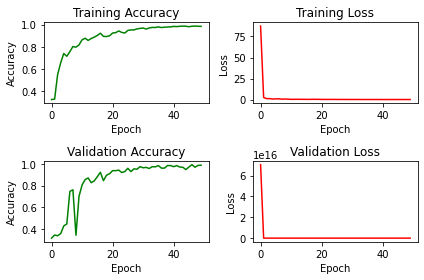

In [ ]:
plot()

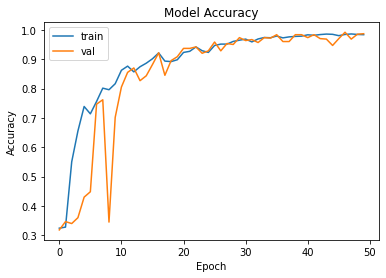

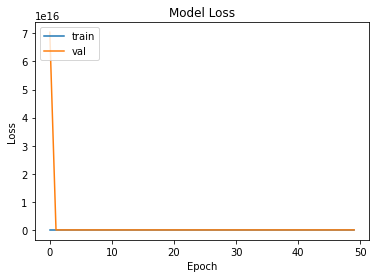

In [ ]:
plot_pair()

In [ ]:
# Storing model predictions into y_pred and converting them into integer classes and stored into y_pred_classes 
y_pred = model1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Selecting highest probability value along axis = 0 i.e. row, to choose that class as label for that image.

              precision    recall  f1-score   support

         ALL       0.75      0.98      0.85       130
         AML       0.99      0.99      0.99       130
     Healthy       0.99      0.68      0.81       130

    accuracy                           0.89       390
   macro avg       0.91      0.89      0.88       390
weighted avg       0.91      0.89      0.88       390



AttributeError: ignored

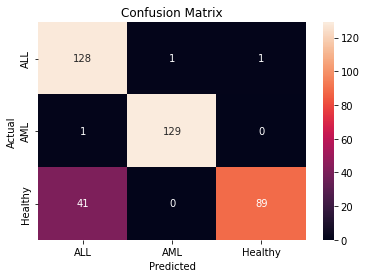

In [ ]:
evaluate_classification_model(y_test_classes, y_pred_classes) # Labels must be integer and not one hot encoded.

In [ ]:
# Displaying images with their Matched and Unmatched labels
display()

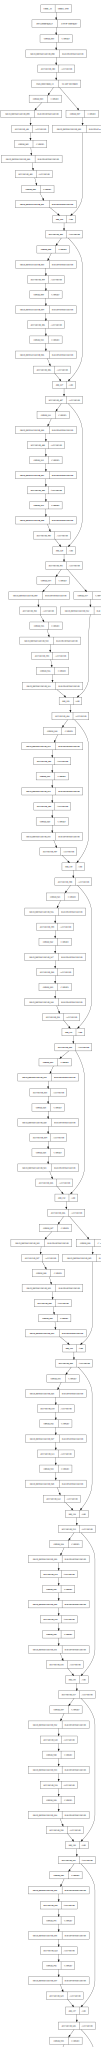

In [ ]:
# Model graph saved 
plot_model(model1, to_file='densenet_pic.png')
SVG(model_to_dot(model1).create(prog='dot', format='svg'))

**Best ResNet Model- test acc-87%, val acc-98%**

In [ ]:
#Assigning class labels into variable class_types
class_types = ['ALL','AML','Healthy']

In [ ]:
# ResNet50 model: Modified
def res_identity(x, filters): 
  ''' renet block where dimension doesnot change.
  The skip connection is just simple identity conncection
  we will have 3 blocks and then input will be added
  '''
  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters # f1=64 and f2=256

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  #x = Dropout(0.20)(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(x)
  #x = Dropout(0.20)(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  #x = Dropout(0.20)(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)        # Added this layer for our dataset

  # add the input 
  x = Add()([x, x_skip])         # x is output from layer by layer from above 3 blocks and x_shortcut is input data.
  x = Activation(activations.relu)(x)

  return x 

In [ ]:
def res_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  ''' 
  x_skip = x  #Input
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  #x= Dropout(0.2)(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x) # The value of x is updated in every line of code

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x_skip) # stride=2 is passed here
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
### Combine the above functions to build 50 layers resnet. 
def resnet50():

  input_im = Input(shape=(257, 257, 3)) # number of classes=3, input image size=257X257
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)
  #x = Dropout(0.2)(x)

  #2nd stage 
  # frm here on only conv block and identity block, no pooling

  x = res_conv(x, s=1, filters=(64, 256))
  # Below lines of code are convolution block:
  # x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  # x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_initializer=glorot_uniform(seed=0))(x)
  # x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_initializer=glorot_uniform(seed=0))(x)
  
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(len(class_types), activation='softmax', kernel_initializer=glorot_uniform(seed=0))(x) #multi-class

  # define the model 

  model = Model(inputs=input_im, outputs=x, name='Resnet50')

  return model

In [ ]:
model3 = resnet50()

In [ ]:
from keras.callbacks import LearningRateScheduler
import math

# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
  return lrate

In [ ]:
lrate = LearningRateScheduler(step_decay,verbose=1) 
#callbacks_list = [lrate] #Creating a list of callbacks

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Model_weights/model_resnet.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=30, verbose=1, mode='auto')

In [ ]:
hist_res1 = model3.fit(X_train,y_train, steps_per_epoch=50, validation_data=(X_validation, y_validation), validation_steps=10,epochs=70,callbacks=[lrate, checkpoint,early])


Epoch 1: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/70
50/50 [==============================] - ETA: 0s - loss: 94.7998 - accuracy: 0.4692
Epoch 1: val_accuracy improved from -inf to 0.31833, saving model to /content/drive/MyDrive/Model_weights/resnet_.hdf5
50/50 [==============================] - 26s 393ms/step - loss: 94.7998 - accuracy: 0.4692 - val_loss: 408816084112637952.0000 - val_accuracy: 0.3183 - lr: 0.1000

Epoch 2: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/70
50/50 [==============================] - ETA: 0s - loss: 23.4100 - accuracy: 0.5967
Epoch 2: val_accuracy did not improve from 0.31833
50/50 [==============================] - 16s 329ms/step - loss: 23.4100 - accuracy: 0.5967 - val_loss: 101388902400.0000 - val_accuracy: 0.3183 - lr: 0.1000

Epoch 3: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/70
50/50 [==============================] - ETA: 0s - loss: 0.6257 - accuracy: 0.6413
Epoch 3: val_accuracy did not improve fr

Renaming the saved model file manually from model_resnet to model_res_87_98

In [ ]:
model_res = load_model('/content/drive/MyDrive/Model_weights/model_res_87_98.hdf5')

In [ ]:
model_res.evaluate(X_test, y_test)
model_res.evaluate(X_validation, y_validation)

19/19 [==============================] - 1s 76ms/step - loss: 0.0564 - accuracy: 0.9800


[0.056448470801115036, 0.9800000190734863]

In [ ]:
h = hist_res1.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

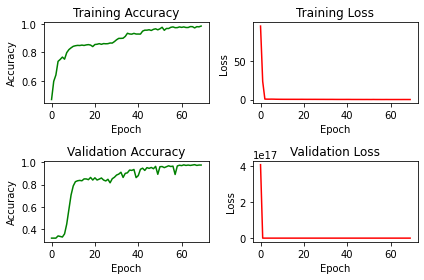

In [ ]:
plot()

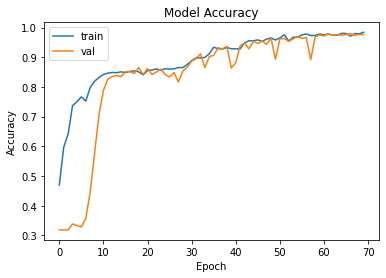

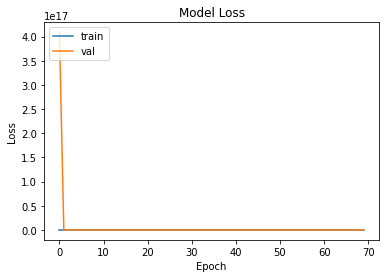

In [ ]:
plot_pair()

In [ ]:
y_pred = model_res.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Selecting highest probability value along axis = 0 i.e. row, to choose that class as label for that image.

              precision    recall  f1-score   support

         ALL       0.76      0.94      0.84       130
         AML       0.98      0.98      0.98       130
     Healthy       0.92      0.71      0.80       130

    accuracy                           0.87       390
   macro avg       0.89      0.87      0.87       390
weighted avg       0.89      0.87      0.87       390



AttributeError: ignored

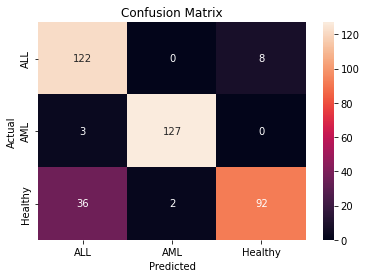

In [ ]:
evaluate_classification_model(y_test_classes, y_pred_classes)

In [ ]:
# Displaying images with their labels
display()

In [ ]:
plot_model(model_res, to_file='resnet_pic.png')
SVG(model_to_dot(model_res).create(prog='dot', format='svg'))